<a href="https://colab.research.google.com/github/erica00j/machinelearning/blob/main/final_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

df= pd.read_csv('/content/data.csv')

del df['id']
del df['Unnamed: 32']

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
scaler = StandardScaler()
scaler.fit(df.drop('diagnosis',axis=1))
scaled_features = scaler.transform(df.drop('diagnosis',axis=1))

X = scaled_features
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

model_predict = model.predict(X_test)

print(confusion_matrix(y_test,model_predict))
print(classification_report(y_test,model_predict))

[[111   1]
 [  2  57]]
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       112
           M       0.98      0.97      0.97        59

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
 
MSE = [1-x for x in cv_scores]
 
#determing the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d' % optimal_k)

The optimal number of neighbors is 3


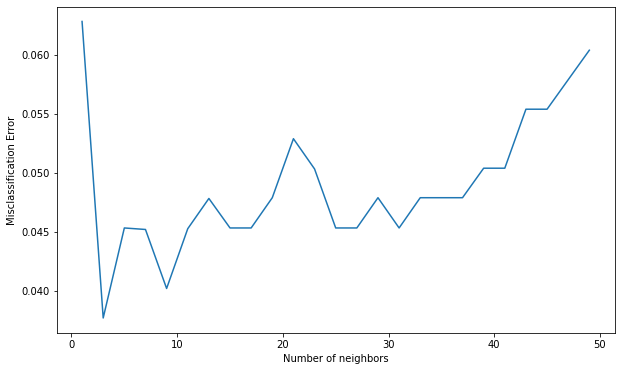

In [ ]:
import matplotlib.pyplot as plt
#plot miscalssification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
new_patient = [
    11.76,
    18.14,
    75,
    431.1,
    0.09968,
    0.05914,
    0.02685,
    0.03515,
    0.1619,
    0.06287,
    0.645,
    2.105,
    4.138,
    49.11,
    30,
    0.01721,
    0.05616,
    0.1091,
    0.0207,
    0.002758,
    13.36,
    23.39,
    85.1,
    553.6,
    0.1137,
    0.07974,
    0.0612,
    0.0716,
    0.1978,
    0.06915
]
 
new_pred = model.predict([new_patient])
new_pred


array(['M'], dtype=object)

In [ ]:
cols = df.columns.tolist()
print("new_patiend = [")
for item in cols:
    print("\0, " + "#" +  item)
print("]")

new_patiend = [
 , #diagnosis
 , #radius_mean
 , #texture_mean
 , #perimeter_mean
 , #area_mean
 , #smoothness_mean
 , #compactness_mean
 , #concavity_mean
 , #concave points_mean
 , #symmetry_mean
 , #fractal_dimension_mean
 , #radius_se
 , #texture_se
 , #perimeter_se
 , #area_se
 , #smoothness_se
 , #compactness_se
 , #concavity_se
 , #concave points_se
 , #symmetry_se
 , #fractal_dimension_se
 , #radius_worst
 , #texture_worst
 , #perimeter_worst
 , #area_worst
 , #smoothness_worst
 , #compactness_worst
 , #concavity_worst
 , #concave points_worst
 , #symmetry_worst
 , #fractal_dimension_worst
]
